In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=42)

In [4]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
print(df.describe())

        Feature_1   Feature_2
count  500.000000  500.000000
mean    -3.390723    2.891821
std      5.276761    6.332416
min    -10.422231   -9.091245
25%     -7.858933   -1.308495
50%     -4.484108    4.482600
75%      0.203749    8.269023
max      7.718760   12.867018


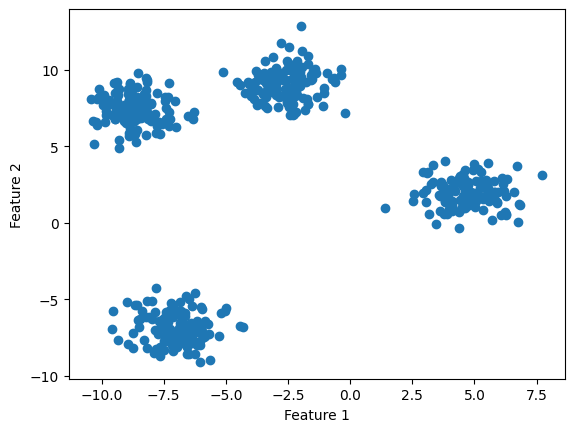

In [5]:
plt.scatter(df['Feature_1'], df['Feature_2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

optimal_cluster_index = silhouette_scores.index(max(silhouette_scores))
optimal_clusters = range(2, 8)[optimal_cluster_index]

In [ ]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters).fit(df)

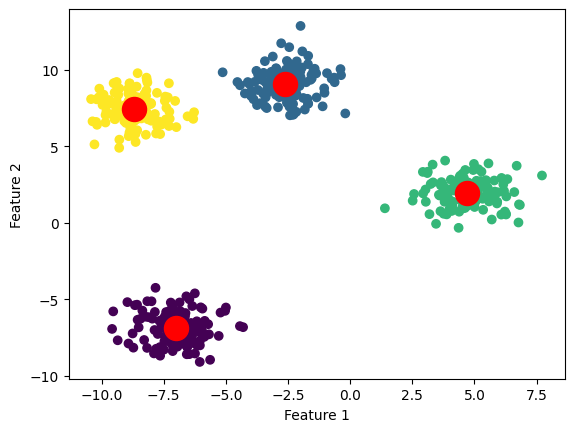

In [9]:
plt.scatter(df['Feature_1'], df['Feature_2'], c=kmeans_optimal.labels_)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()